# Pourquoi est-il généralement conseillé de définir des Seeds pour les générateurs aléatoires ?

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.datasets import make_circles
import itertools as it

import seaborn as sns
sns.set()

In [2]:
colors = [ '#FF7051', '#00B9FF', '#46C7C7']

## Créer un Dataset

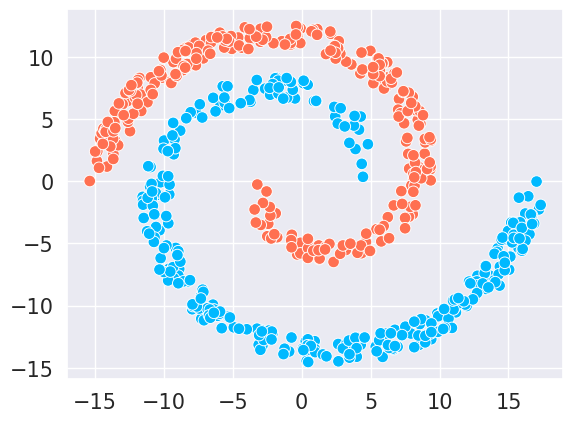

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Définir le nombre de points de données
N = 300

# Définir les deux bras spiraux
theta = np.sqrt(np.random.rand(N)) * 2 * np.pi   # angle
r_a = 2 * theta + np.pi + 2*np.random.rand(N)    # rayon pour le bras a
data_a = np.array([np.cos(theta) * r_a, np.sin(theta) * r_a]).T
r_b = -2 * theta - np.pi + 2*np.random.rand(N)   # rayon pour le bras b
data_b = np.array([np.cos(theta) * r_b, np.sin(theta) * r_b]).T

# Déplacer les deux bras pour qu'ils aient le même centre
shift = np.array([0,0])   # décalage x-y
data_a += shift
data_b -= shift

# Concaténer les deux bras
data = np.concatenate((data_a, data_b))

# Créer les étiquettes cibles
labels = np.concatenate((np.ones(N), np.zeros(N)))

# Mélanger les données et les étiquettes à l'unisson
indices = np.random.permutation(N * 2)
data, labels = data[indices], labels[indices]

# Visualiser le dataset
sns.scatterplot(x=data[:, 0], y=data[:, 1], c=[colors[int(label)] for label in labels], s = 70)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

## Traiter le Dataset

In [4]:
X = torch.tensor(data, dtype=torch.float32)
y = torch.tensor(labels, dtype=torch.long)

x_min, x_max = float(X[:, 0].min()), float(X[:, 0].max())
y_min, y_max = float(X[:, 1].min()), float(X[:, 1].max())

new_x_max, new_x_min = 4, -4
new_y_max, new_y_min = 4, -4

X[:, 0] = (((X[:, 0] - x_min)/(x_max-x_min))*(new_x_max-new_x_min)) + new_x_min
X[:, 1] = (((X[:, 1] - y_min)/(y_max-y_min))*(new_y_max-new_y_min)) + new_y_min

## Entraînement du modèle

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 2)
        self.fc3 = nn.Linear(2, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

def accuracy(outputs, labels):
    return int(torch.sum(torch.argmax(outputs, axis = 1) == y))/len(outputs)

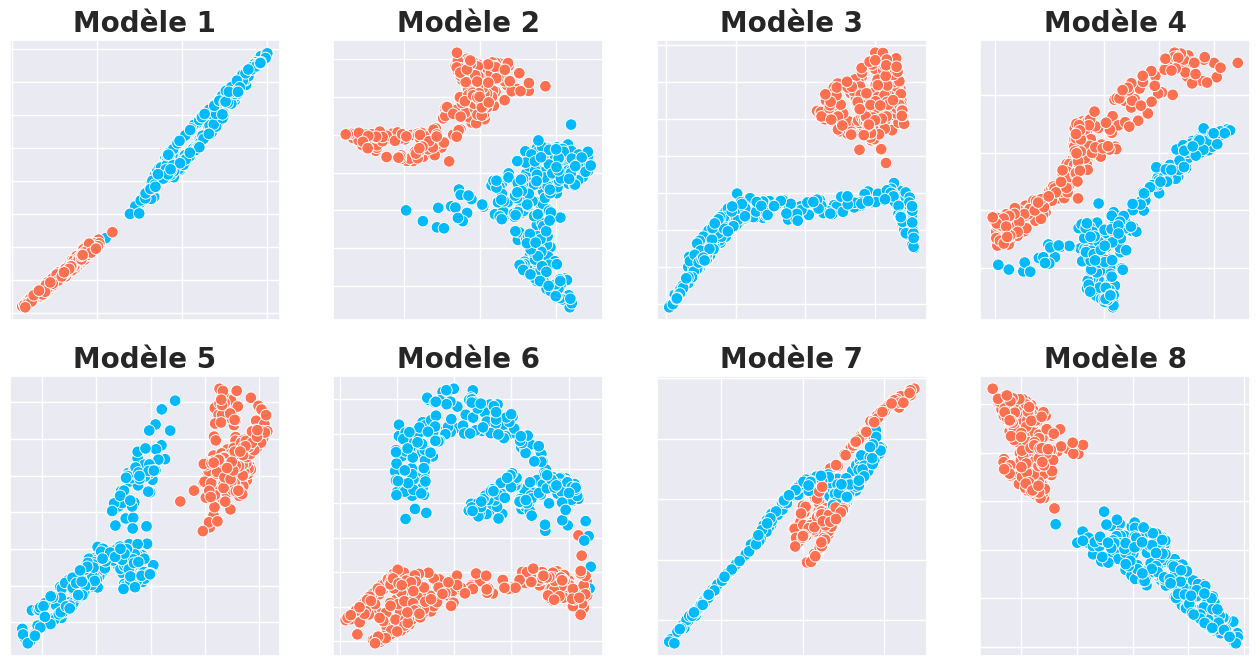

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i in range(8):
    # Définir le modèle
    input_size = 2
    hidden_size = 100
    total_epochs = 300
    model = NeuralNetwork(input_size, hidden_size)

    # Définir la fonction de perte et l'optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    for epoch in range(total_epochs):

        outputs = model(X)
        loss = criterion(outputs, y)

        # Backward et optimizer
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = accuracy(outputs, y)

    x = F.relu(model.fc1(X))
    x = (model.fc2(x)).detach().numpy()

    ax_ = sns.scatterplot(x=x[:, 0], y=x[:, 1], ax=axes[i//4,i%4], c=[colors[int(label)] for label in labels], s = 70)
    ax_.set_title(f"Modèle {i+1}", fontsize = 20, fontweight="bold")
    ax_.set(xlabel=None, ylabel=None, yticklabels=[], xticklabels=[])
plt.show()